In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [307]:
df = pd.read_csv('data.csv')

In [308]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,148,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,136,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,117,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,114,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,116,307,601,23.0,47.1,2024-05-22T14:38:0


In [309]:
df.shape

(589876, 11)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589876 entries, 0 to 589875
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CO2          589876 non-null  int64  
 1   TVOC         589876 non-null  int64  
 2   PM10         589876 non-null  float64
 3   PM2.5        589876 non-null  float64
 4   CO           589876 non-null  int64  
 5   Air Quality  589876 non-null  int64  
 6   LDR          589876 non-null  int64  
 7   O3           589876 non-null  int64  
 8   Temp         589876 non-null  float64
 9   Hum          589876 non-null  float64
 10  ts           589876 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 49.5+ MB


In [311]:
df.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000
mean,596.062072,50.830058,43.469934,18.473955,408.533092,113.971184,895.096527,634.037476,26.356252,45.179883
std,683.037810,465.210328,379.081430,42.088928,119.226035,53.524384,165.804552,66.548247,3.202987,6.695668
min,-32195.000000,-32754.000000,2.500000,0.000000,109.000000,24.000000,8.000000,435.000000,19.300000,24.500000
25%,419.000000,45.000000,5.010000,6.200000,326.000000,66.000000,915.000000,590.000000,24.200000,41.600000
50%,439.000000,50.000000,7.570000,11.500000,407.000000,95.000000,932.000000,632.000000,25.800000,45.100000
75%,481.000000,60.000000,10.130000,20.600000,487.000000,161.000000,945.000000,679.000000,27.900000,48.700000
max,5000.000000,1098.000000,17566.980000,1537.680000,885.000000,373.000000,1000.000000,937.000000,42.800000,85.900000


In [312]:
def categorize_air_quality(value):
    if 0 <= value <= 50:
        return 'Good'
    elif 51 <= value <= 100:
        return 'Moderate'
    elif 101 <= value <= 150:
        return 'Unhealthy for Sensitive'
    elif 151 <= value <= 200:
        return 'Unhealthy'
    elif 201 <= value <= 400:
        return 'Hazardous'
    else:
        return 'Unknown'


In [313]:
df['Air Quality'] = df['Air Quality'].apply(categorize_air_quality)

In [314]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,Unhealthy for Sensitive,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,Unhealthy for Sensitive,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,Unhealthy for Sensitive,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,Unhealthy for Sensitive,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,Unhealthy for Sensitive,307,601,23.0,47.1,2024-05-22T14:38:0


In [315]:
df.tail()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
589871,451,59,9.90,30.1,386,Moderate,884,786,29.1,36.1,2025-01-06T22:10:2
589872,419,15,11.18,30.1,385,Moderate,884,786,29.2,36.0,2025-01-06T22:11:2
589873,475,66,6.63,30.5,386,Moderate,885,785,29.3,35.9,2025-01-06T22:12:1
589874,450,64,10.40,29.3,389,Moderate,884,793,29.0,35.8,2025-01-06T22:13:1
589875,439,59,7.37,30.4,389,Moderate,884,795,28.4,36.2,2025-01-06T22:14:0


### Data explaining :
- `CO2`: Carbon dioxide concentration (ppm – parts per million).
- `TVOC`: Total Volatile Organic Compounds (ppb – parts per billion).
- `PM10`: Particulate Matter with a diameter of 10 micrometers or less (µg/m³).
- `PM2.5`: Fine Particulate Matter with a diameter of 2.5 micrometers or less (µg/m³).
- `CO`: Carbon monoxide concentration (likely in ppm or ppb).
- `Air` Quality: Air quality index or score (higher values might indicate worse air quality).
- `LDR`: Light Dependent Resistor reading (indicates light intensity).
- `O3`: Ozone concentration (likely in ppb).
- `Temp`: Temperature (°C).
- `Hum`: Humidity (%).
- `ts`: Timestamp (date and time of data collection).


In [316]:
# Convert timestamps in df safely
df["ts"] = pd.to_datetime(df["ts"], format="%Y-%m-%dT%H:%M:%S", errors="coerce")

# Extract useful time features
df["hour"] = df["ts"].dt.hour
df["day"] = df["ts"].dt.day
df["month"] = df["ts"].dt.month
df["year"] = df["ts"].dt.year

In [317]:
df.drop(columns=["ts"], inplace=True)

In [318]:
df.isna().sum()

,0
CO2,0
TVOC,0
PM10,0
PM2.5,0
CO,0
Air Quality,0
LDR,0
O3,0
Temp,0
Hum,0


In [319]:
df.dropna(inplace=True)

In [320]:
df.isna().sum()

,0
CO2,0
TVOC,0
PM10,0
PM2.5,0
CO,0
Air Quality,0
LDR,0
O3,0
Temp,0
Hum,0


## Data preprocessing:

### outlier detection

In [321]:
df2=df.copy()

In [322]:
# List of numerical columns (excluding 'ts' since it's a timestamp)
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

In [323]:
# Detect outliers using IQR
Q1 = df2[num_cols].quantile(0.25)
Q3 = df2[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [324]:
IQR

,0
CO2,62.00
TVOC,15.00
PM10,5.12
PM2.5,14.40
CO,161.00
LDR,30.00
O3,89.00
Temp,3.70
Hum,7.10
hour,12.00


In [325]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [326]:
# Find outliers (values outside the range)
outliers = ((df2[num_cols] < lower_bound) | (df2[num_cols] > upper_bound))

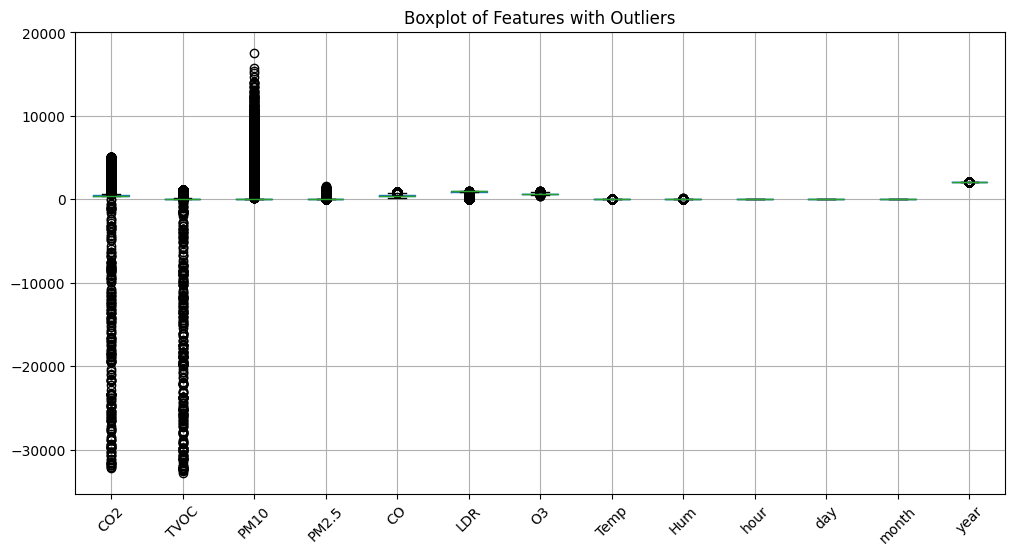

In [327]:
# Draw boxplots
plt.figure(figsize=(12, 6))
df2[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [328]:
# Remove outliers
df2 = df2[~outliers.any(axis=1)]  # Keep only non-outlier rows

In [329]:
df.shape[0] - df2.shape[0]

238261

- 238261 rows detected as outlier, I think they are meannigfull and not anomlies
- Now, we need here Domain Knowledge and Business Logic to know if this portion of data is really outlier or not .

In [330]:
# # Compute outlier severity score (distance from nearest bound)
# def compute_outlier_score(row):
#     score = 0
#     for col in num_cols:
#         if row[col] < lower_bound[col]:  # Below lower bound
#             score += abs(row[col] - lower_bound[col])
#         elif row[col] > upper_bound[col]:  # Above upper bound
#             score += abs(row[col] - upper_bound[col])
#     return score

# # Apply the function to compute scores
# df["Outlier_Score"] = df.apply(compute_outlier_score, axis=1)

# # Extract and sort the worst 10 outliers
# worst_outliers = df[df["Outlier_Score"] > 0].sort_values(by="Outlier_Score", ascending=False).head(10)

In [331]:
# worst_outliers

- Quetion to be asked to Domain , is these outliers ??!

In [332]:
df2.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,hour,day,month,year
25,564,24,9.63,5.0,282,Unhealthy for Sensitive,963,570,30.8,40.7,15.0,22.0,5.0,2024.0
33,553,23,10.91,4.7,264,Unhealthy for Sensitive,941,540,30.8,39.2,15.0,22.0,5.0,2024.0
4366,564,24,5.71,30.4,301,Unhealthy for Sensitive,970,503,32.3,34.5,8.0,26.0,5.0,2024.0
4367,556,23,11.84,28.2,286,Unhealthy for Sensitive,975,499,31.5,35.1,8.0,26.0,5.0,2024.0
4369,552,23,10.82,29.9,267,Unhealthy for Sensitive,977,505,30.8,35.8,8.0,26.0,5.0,2024.0


### feature scaling
- we will use noramliztion

In [333]:
# Assuming df2 is your DataFrame
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

# Columns to exclude
exclude_cols = ['hour', 'day', 'month', 'year']

# Remove the excluded columns from the list of numeric columns
num_cols = [col for col in num_cols if col not in exclude_cols]

# Apply MinMaxScaler to the remaining numeric columns
min_max_scaler = MinMaxScaler()
df3 = df2.copy()
df3[num_cols] = min_max_scaler.fit_transform(df2[num_cols])

In [334]:
df3.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,hour,day,month,year
25,0.954955,0.016949,0.713,0.107914,0.275974,Unhealthy for Sensitive,0.808696,0.304598,0.814286,0.342756,15.0,22.0,5.0,2024.0
33,0.905405,0.000000,0.841,0.100719,0.246753,Unhealthy for Sensitive,0.617391,0.218391,0.814286,0.289753,15.0,22.0,5.0,2024.0
4366,0.954955,0.016949,0.321,0.717026,0.306818,Unhealthy for Sensitive,0.869565,0.112069,0.921429,0.123675,8.0,26.0,5.0,2024.0
4367,0.918919,0.000000,0.934,0.664269,0.282468,Unhealthy for Sensitive,0.913043,0.100575,0.864286,0.144876,8.0,26.0,5.0,2024.0
4369,0.900901,0.000000,0.832,0.705036,0.251623,Unhealthy for Sensitive,0.930435,0.117816,0.814286,0.169611,8.0,26.0,5.0,2024.0


In [335]:
df3.describe()

,CO2,TVOC,PM10,PM2.5,CO,LDR,O3,Temp,Hum,hour,day,month,year
count,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.000000,350953.0
mean,0.374391,0.494877,0.497693,0.295858,0.494159,0.541336,0.504010,0.464784,0.515759,11.534322,16.081036,9.450399,2024.0
std,0.128249,0.161837,0.290002,0.221927,0.170998,0.165033,0.159509,0.169557,0.173505,6.903962,8.946985,1.711582,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2024.0
25%,0.283784,0.389831,0.246000,0.124700,0.375000,0.443478,0.385057,0.342857,0.406360,5.000000,8.000000,8.000000,2024.0
50%,0.355856,0.457627,0.497000,0.244604,0.488636,0.547826,0.488506,0.457143,0.515901,12.000000,16.000000,9.000000,2024.0
75%,0.418919,0.593220,0.748000,0.422062,0.603896,0.660870,0.612069,0.578571,0.625442,18.000000,24.000000,11.000000,2024.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,31.000000,12.000000,2024.0


### Data splitting

In [336]:
df3['Air Quality'].value_counts()

,count
Air Quality,
Moderate,171157
Unhealthy,107307
Unhealthy for Sensitive,44638
Good,16047
Hazardous,11804


In [337]:
df['Air Quality'].value_counts()

,count
Air Quality,
Moderate,255983
Unhealthy,174047
Unhealthy for Sensitive,89971
Good,43118
Hazardous,26095


- Before we apply SMOTE, we need to train_test split to prevernt data leakage



In [338]:
#Before we apply SMOTE, we need to train_test split to prevernt data leakage
X = df3.drop(columns=['Air Quality'])
y = df3['Air Quality']


In [339]:
X.isna().sum()

,0
CO2,0
TVOC,0
PM10,0
PM2.5,0
CO,0
LDR,0
O3,0
Temp,0
Hum,0
hour,0


In [341]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [342]:
y.shape

(350953,)

In [343]:
y_train.shape

(280762,)

### SMOTE - (Synthetic Minority Over-sampling Technique)

In [344]:
X_train.head()

,CO2,TVOC,PM10,PM2.5,CO,LDR,O3,Temp,Hum,hour,day,month,year
248208,0.337838,0.355932,0.029,0.254197,0.240260,0.800000,0.264368,0.164286,0.374558,6.0,11.0,12.0,2024.0
355548,0.216216,0.305085,0.278,0.326139,0.342532,0.765217,0.333333,0.471429,0.540636,19.0,27.0,7.0,2024.0
117542,0.256757,0.355932,0.920,0.083933,0.345779,0.495652,0.318966,0.607143,0.593640,9.0,5.0,9.0,2024.0
355749,0.414414,0.372881,0.172,0.103118,0.274351,0.747826,0.313218,0.485714,0.586572,22.0,27.0,7.0,2024.0
39476,0.328829,0.440678,0.481,0.052758,0.420455,0.513043,0.341954,0.678571,0.378092,1.0,13.0,7.0,2024.0


- we need to convert expand ts column to make smote

In [345]:
X_train.isna().sum()

,0
CO2,0
TVOC,0
PM10,0
PM2.5,0
CO,0
LDR,0
O3,0
Temp,0
Hum,0
hour,0


In [346]:
X_train.dropna(inplace=True)

In [348]:
# Apply SMOTE on the training data
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [349]:
X_train.shape, y_train.shape

((280762, 13), (280762,))

In [350]:
X_train_smote.shape, y_train_smote.shape

((684625, 13), (684625,))

In [351]:
type(y_train_smote)

pandas.core.series.Series

In [352]:
y_train_smote.value_counts()

,count
Air Quality,
Unhealthy for Sensitive,136925
Good,136925
Moderate,136925
Unhealthy,136925
Hazardous,136925


- Now, my data is balanced.

In [353]:
X_train_smote.head()

,CO2,TVOC,PM10,PM2.5,CO,LDR,O3,Temp,Hum,hour,day,month,year
0,0.337838,0.355932,0.029,0.254197,0.240260,0.800000,0.264368,0.164286,0.374558,6.0,11.0,12.0,2024.0
1,0.216216,0.305085,0.278,0.326139,0.342532,0.765217,0.333333,0.471429,0.540636,19.0,27.0,7.0,2024.0
2,0.256757,0.355932,0.920,0.083933,0.345779,0.495652,0.318966,0.607143,0.593640,9.0,5.0,9.0,2024.0
3,0.414414,0.372881,0.172,0.103118,0.274351,0.747826,0.313218,0.485714,0.586572,22.0,27.0,7.0,2024.0
4,0.328829,0.440678,0.481,0.052758,0.420455,0.513043,0.341954,0.678571,0.378092,1.0,13.0,7.0,2024.0


In [359]:
# Apply One-Hot Encoding to features (if needed)
encoder = OneHotEncoder()
y_train_smote = encoder.fit_transform(y_train_smote.values.reshape(-1, 1))

In [360]:
y_train_smote.shape

(684625, 5)

In [362]:
X_train_smote.shape

(684625, 13)

- Now the data is ready for training